In [19]:
import torch, os, math
from math import sqrt
import torch.nn as nn
import torch.nn.functional as F
from einops import rearrange
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np

In [24]:
from torchvision.datasets import MNIST
from torchvision import transforms
tf = transforms.Compose([transforms.ToTensor()])
data = MNIST("/media/volume/sdb/data", train=False, download=False, transform=tf)
print(len(data))
print(data[0][0].shape)
images, labels = zip(*[data[i] for i in range(32)])
images = np.array(images)
print(images.shape)

10000
torch.Size([1, 28, 28])
(32, 1, 28, 28)


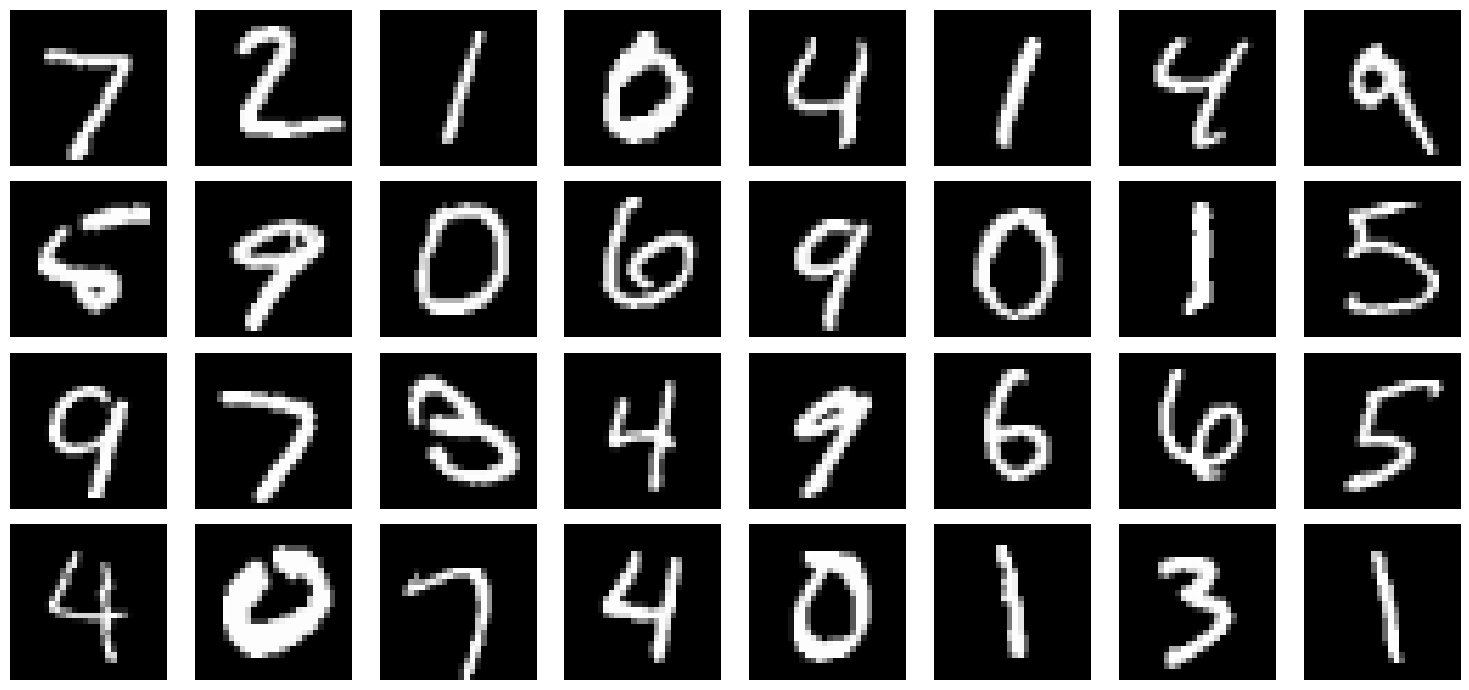

In [25]:
# Set up the plot
fig, axes = plt.subplots(nrows=4, ncols=8, figsize=(15, 7))

# Flatten the axes array for easy iteration
axes = axes.flatten()

for i in range(32):
    # Display image
    axes[i].imshow(images[i].squeeze(), cmap='gray')

    # Remove axis ticks
    axes[i].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()

# Forward Diffusion Process

In [26]:
P_mean = -1.2
P_std = 1.2

def noise_distribution(data):
    return np.exp((P_mean + P_std * np.random.randn(data.shape[0])))

sigmas = noise_distribution(images)
print(sigmas.shape)
sigmas = rearrange(sigmas, 'b -> b 1 1 1')
print(sigmas.shape)
print(sigmas.squeeze())

(32,)
(32, 1, 1, 1)
[0.06485925 0.39151759 0.04746639 0.19907567 0.15311729 0.26351275
 1.31906695 0.98389839 0.05927354 0.03614735 0.31777625 0.24485177
 0.86752387 0.18711118 0.34035148 0.21480246 0.24882988 1.04916462
 0.41844292 0.2059767  0.13237873 0.17319265 0.31922286 0.24599604
 0.03886689 0.36837155 0.3512416  0.06440346 0.81338126 0.49106893
 0.33227091 0.42375651]


In [27]:
def forward_diffusion_process(data, sigmas):
    eps = np.random.randn(32, 1, 28, 28)
    delta = sigmas * eps
    data_t = data + delta
    return data_t, delta

x_t, delta = forward_diffusion_process(images, sigmas)
print(x_t.shape)
print(delta.shape)


(32, 1, 28, 28)
(32, 1, 28, 28)


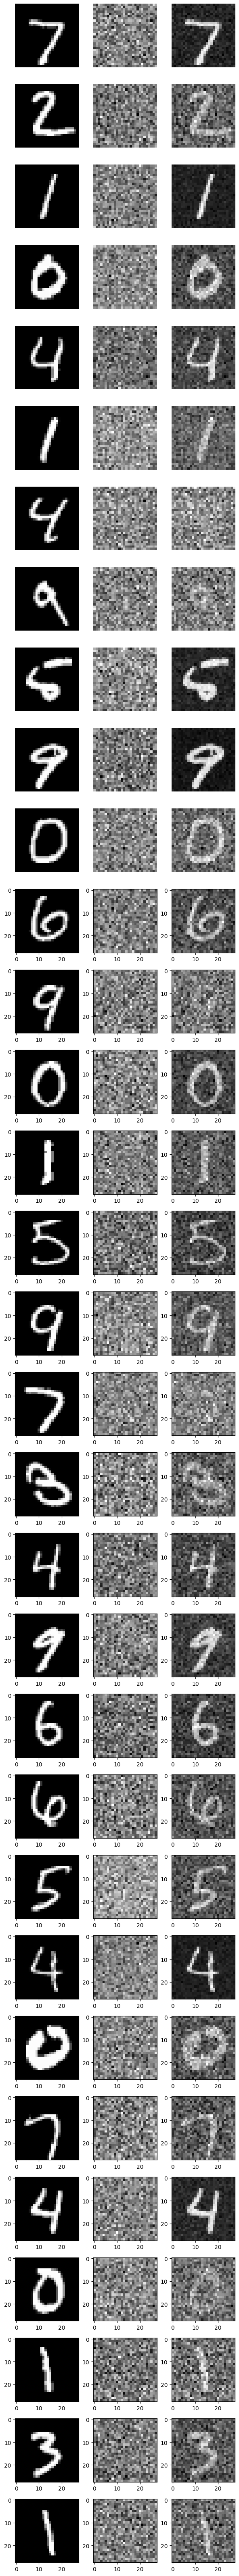

In [28]:
# Set up the plot
fig, axes = plt.subplots(nrows=32, ncols=3, figsize=(3*2, 32*2))

# Flatten the axes array for easy iteration
axes = axes.flatten()

j = 0
for i in range(32):
    # Display image
    axes[j].imshow(images[i].squeeze(), cmap='gray')
    axes[j+1].imshow(delta[i].squeeze(), cmap='gray')
    axes[j+2].imshow(x_t[i].squeeze(), cmap='gray')
    j += 3

    # Remove axis ticks
    axes[i].axis('off')
    axes[i+1].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()

# Plotting the loss weighting function

In [29]:
# first we need to compute the sigma_data variable which is just the std of our dataset
sigma_data = np.std(images.flatten())
print('sigma_data = ', sigma_data)
def loss_weight(sigmas):
    return (sigmas ** 2 + sigma_data ** 2) * (sigmas * sigma_data) ** -2

loss_weights = loss_weight(sigmas)
print(loss_weights.shape)
print(loss_weights.squeeze())
print(sigmas.squeeze())

sigma_data =  0.2935885
(32, 1, 1, 1)
[249.31650481  18.12546061 455.44279957  36.83440225  54.25490272
  26.0028436   12.1764418   12.63470661 296.23009614 776.92896644
  21.50448878  28.28161136  12.93043978  40.16449063  20.2343699
  33.27483186  27.75254154  12.51018303  17.31291086  35.17193697
  68.6658853   44.93982793  21.41494006  28.12679541 673.57480735
  18.9710357   19.70736325 252.69306238  13.11322081  15.74852765
  20.65935475  17.17058062]
[0.06485925 0.39151759 0.04746639 0.19907567 0.15311729 0.26351275
 1.31906695 0.98389839 0.05927354 0.03614735 0.31777625 0.24485177
 0.86752387 0.18711118 0.34035148 0.21480246 0.24882988 1.04916462
 0.41844292 0.2059767  0.13237873 0.17319265 0.31922286 0.24599604
 0.03886689 0.36837155 0.3512416  0.06440346 0.81338126 0.49106893
 0.33227091 0.42375651]


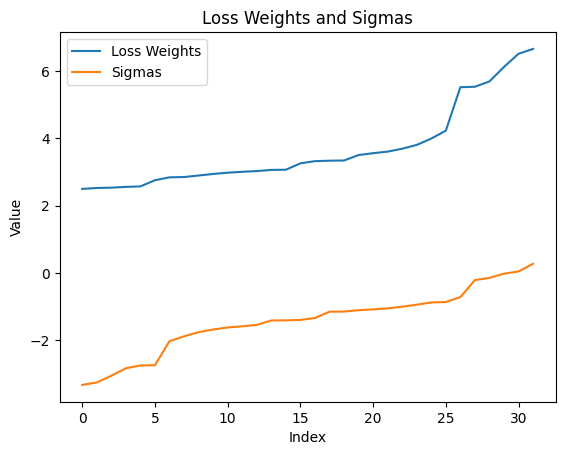

In [43]:
plt.figure()
plt.plot(np.log(np.sort(loss_weights.squeeze())), label='Loss Weights')
plt.plot(np.log(np.sort(sigmas.squeeze())), label='Sigmas')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Loss Weights and Sigmas')
plt.legend()
plt.show()